# Классификация текстов

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.snowball import RussianStemmer
import seaborn as sns


Разбиение на тестовое и обучающее множество

In [9]:
m = Mystem()
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "



In [10]:
import os

In [11]:
for i in os.listdir('./data/'):
    print(i)

stopwords.txt
ner_dataset.csv
task3.txt
task1.txt
task4.txt
task2.txt
.DS_Store
dinos.txt


In [12]:
import pandas as pd

data = pd.read_csv('/home/zamarseny/Data_Science/competitions/NG_hack_2019/data/lenta-ru-news.csv'
                   #, usecols = ['text', 'topic']
                  )
data.dropna(subset=['text', 'topic'], inplace = True)

In [13]:
data.head()

,url,title,text,topic,tags
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество


In [7]:
data.groupby(['topic']).url.count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

,topic,count
16,Россия,160516
12,Мир,136679
22,Экономика,79538
19,Спорт,64421
9,Культура,53802
3,Бывший СССР,53402
13,Наука и техника,53136
6,Интернет и СМИ,44675
5,Из жизни,27611
4,Дом,21734


In [12]:
data.tail()

,url,title,text,topic,tags
739346,https://lenta.ru/news/1999/08/31/cholera/,Южно-Сахалинск объявлен очагом холеры,Сегодня областной центр Сахалина и Курил получ...,Россия,Все
739347,https://lenta.ru/news/1999/08/31/polit_blok/,Леворадикалы создают предвыборный блок,Бывший шеф Службы безопасности президента Але...,Россия,Все
739348,https://lenta.ru/news/1999/08/31/dagestan/,В горах Дагестана идут активные боевые действия,Сегодня утром в районах дагестанских селений Ч...,Россия,Все
739349,https://lenta.ru/news/1999/08/31/karachaevo/,Карачаево-Черкесия раскололась по национальном...,Намеченная на сегодняшний день церемония вступ...,Россия,Все
739350,https://lenta.ru/news/1999/08/31/korzhakov/,Коржаков готов рассказать Генпрокуратуре про ф...,На состоявшейся сегодня в Москве пресс-конфере...,Россия,Все


In [15]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['topic'].unique():
    corpus_sample = data[data['topic']==cl]
    if len(corpus_sample) < 600:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:101,:])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[100:150,:])
    elif len(corpus_sample) > 600:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:501,:])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[500:600,:])

In [25]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_sample_train['text'])
#print(vectorizer.get_feature_names())
print(X.shape)
X_te=vectorizer.transform(corpus_sample_test['text'])

(8290, 122130)


In [16]:
#from catboost import CatBoostClassifier, Pool

#model = CatBoostClassifier(learning_rate=0.03)

#model.fit(X, corpus_sample_train['topic'],
#          #train_labels,
#          verbose=False,
#          plot=False)

In [17]:
import xgboost as xgb

In [29]:
from xgboost import XGBClassifier
#from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

#mlb = MultiLabelBinarizer()
y = corpus_sample_train['topic']#mlb.fit_transform(y)

clf.fit(X, y)

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x7fc18d947978>>
Traceback (most recent call last):
  File "/home/zamarseny/.local/lib/python3.6/site-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          n_jobs=None)

In [30]:
true=corpus_sample_test['topic']
predictions = clf.predict(X_te)#clf.predict(corpus_sample_test['text'])

Precision:   0.80
Recall:   0.78
F1-measure:   0.79
Accuracy:   0.79
                   precision    recall  f1-score   support

   69-я параллель       0.85      0.89      0.87       100
           Бизнес       0.68      0.72      0.70       100
      Бывший СССР       0.72      0.79      0.75       100
              Дом       0.88      0.82      0.85       100
         Из жизни       0.75      0.89      0.82       100
   Интернет и СМИ       0.70      0.75      0.72       100
             Крым       0.92      0.88      0.90       100
    Культпросвет        0.84      0.72      0.77        50
         Культура       0.81      0.76      0.78       100
          Легпром       0.91      0.71      0.80        14
              Мир       0.70      0.76      0.73       100
  Наука и техника       0.79      0.74      0.76       100
      Путешествия       0.85      0.67      0.75       100
           Россия       0.63      0.57      0.60       100
Силовые структуры       0.77      0.89      0

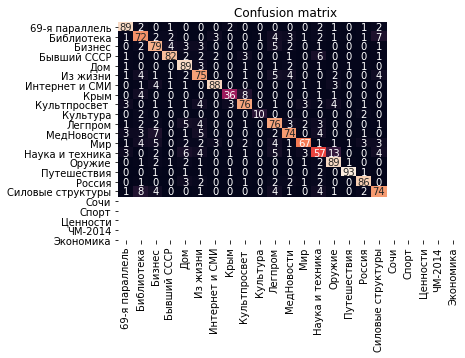

In [31]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_



labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()